In [2]:
import pandas as pd

#1. Read CSV into pandas dataframe
df = pd.read_csv("../data/Fremont_Bridge_Bicycle_Counter.csv")

df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [3]:
#Data type
df.dtypes

Date                             object
Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [4]:
#2.(i). Add column - Total Bicycle Count
df['Total Bicycle Count'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk']
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,13.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,10.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,5.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,7.0


In [5]:
#Covert Date column to datetime instead of object
df['Date'] = pd.to_datetime(df['Date'])

#Checking data type
print(df.dtypes)

#2.(ii). Add column = Hour of the day
df['Hour'] = df['Date'].dt.hour
df.head()

Date                            datetime64[ns]
Fremont Bridge Total                   float64
Fremont Bridge East Sidewalk           float64
Fremont Bridge West Sidewalk           float64
Total Bicycle Count                    float64
dtype: object


,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count,Hour
0,2012-10-03 00:00:00,13.0,4.0,9.0,13.0,0
1,2012-10-03 01:00:00,10.0,4.0,6.0,10.0,1
2,2012-10-03 02:00:00,2.0,1.0,1.0,2.0,2
3,2012-10-03 03:00:00,5.0,2.0,3.0,5.0,3
4,2012-10-03 04:00:00,7.0,6.0,1.0,7.0,4


In [6]:
#2.(iii).Add column - year
df['Year'] = df['Date'].dt.year
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count,Hour,Year
0,2012-10-03 00:00:00,13.0,4.0,9.0,13.0,0,2012
1,2012-10-03 01:00:00,10.0,4.0,6.0,10.0,1,2012
2,2012-10-03 02:00:00,2.0,1.0,1.0,2.0,2,2012
3,2012-10-03 03:00:00,5.0,2.0,3.0,5.0,3,2012
4,2012-10-03 04:00:00,7.0,6.0,1.0,7.0,4,2012


In [7]:
#New df with subset of data from year = 2016
df_subset = df[df['Year'] == 2016]

df_subset.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count,Hour,Year
28440,2016-01-01 00:00:00,18.0,9.0,9.0,18.0,0,2016
28441,2016-01-01 01:00:00,15.0,3.0,12.0,15.0,1,2016
28442,2016-01-01 02:00:00,11.0,6.0,5.0,11.0,2,2016
28443,2016-01-01 03:00:00,7.0,1.0,6.0,7.0,3,2016
28444,2016-01-01 04:00:00,2.0,0.0,2.0,2.0,4,2016


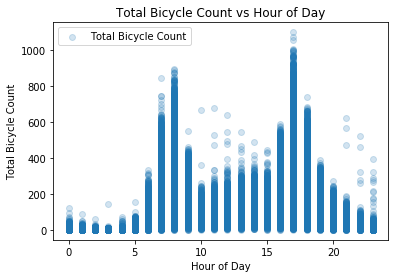

In [8]:
import matplotlib.pyplot as plt

#Plot count by hour
plt.scatter('Hour', 'Total Bicycle Count', data=df, alpha=0.2)
plt.title('Total Bicycle Count vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Bicycle Count')
plt.legend();

In [9]:
#Average busiest day

df.groupby(by=['Hour'], as_index=False) \
    .mean() \
    .sort_values(by=['Total Bicycle Count'], ascending=[False]) \
    .iloc[0,[0, 3]]

Hour                             17.000000
Fremont Bridge West Sidewalk    279.774571
Name: 17, dtype: float64